# Animate TOD Glitches

This notebook aims to make an animation of the glitches happening in a specific TOD. 

In [4]:
import sys
import cPickle
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
from pixels import PixelReader
import numpy as np
import traceback

## Auxilary Functions

In [5]:
def cut_contains(cv, v):
    for c in cv:
        if c[0]<=v and c[1]>=v:
            return True
    return False

def pixels_affected(cs, v):
    return [int(p) for p in cs if cut_contains(cs[p], v)]

def affected_pos_with_spread(cs, v):
    pixels = pixels_affected(cs, v)
    pos = np.array([pr.getXY(p) for p in pixels])
    std = np.std(pos, 0)
    spread = np.sqrt(std[0]**2+std[1]**2)
    return np.hstack([np.mean(pos, 0), [spread]])

def get_track_with_spread(cs, time_range):
    start_v = time_range[0]
    end_v = time_range[1]
    return np.vstack([affected_pos_with_spread(cs, v) for v in range(start_v, end_v)])

## 2. Pick a sample TOD

[INFO] Working on 13000


/mnt/act3/users/yilun/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


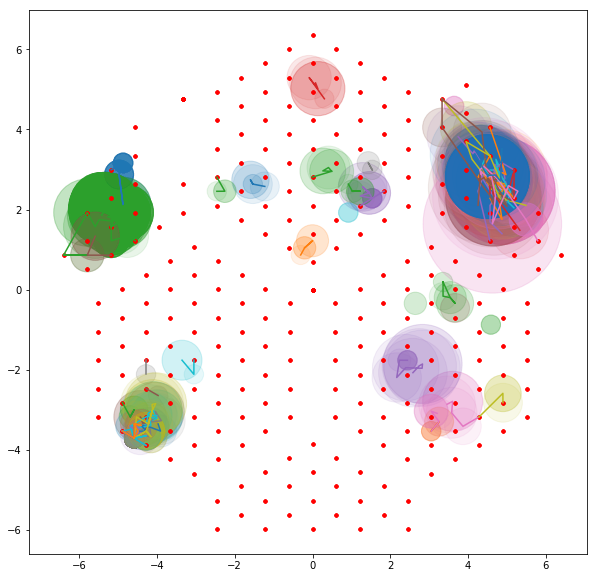

In [6]:
# Loading running parameters
input_dir = "outputs/coincident_signals_subset/"
output_dir = "outputs/tracks_with_spread/"
cut_id = 13000

# Load pixel reader
pr = PixelReader()

try: 
    print '[INFO] Working on', cut_id
    cut_data = cPickle.load(open(input_dir+"%d.pickle" % cut_id, "r"))
    cs = cut_data['coincident_signals']
    signals = [p[0:2] for p in cut_data['peaks']]
    plt.figure(figsize=(10,10))
    pr.plot()
    for s in signals:
        pos = get_track_with_spread(cs, s)
        pos_downsample = pos[::downsample]
        plt.scatter(pos_downsample[:,0], pos_downsample[:,1], marker='o', s=3000*pos_downsample[:,2]**2, alpha=0.1)
        plt.plot(pos[:,0],pos[:,1])
    #plt.savefig(output_dir+"%d.png" % cut_id)

except Exception as e:
    print "[ERROR] Exception caught!"
    print e
    traceback.print_exc(file=sys.stdout)

## 3. Make a sample animation

In [14]:
from matplotlib import animation,rc

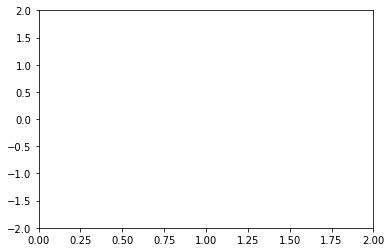

In [8]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [12]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [13]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [15]:
anim

In [16]:
rc('animation', html='html5')

In [17]:
anim

KeyError: u'ffmpeg'

In [19]:
anim.save("test.mp4")

/mnt/act3/users/yilun/anaconda2/lib/python2.7/site-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


RuntimeError: Error creating movie, return code: 1 Try setting mpl.verbose.set_level("helpful")